# Problem Statment :Scrap following Tables From given website 

**Table 1 : From 1955 to 2020** 

**Table 2 : forcasting from 2020 to 2050**

"https://www.worldometers.info/world-population/"

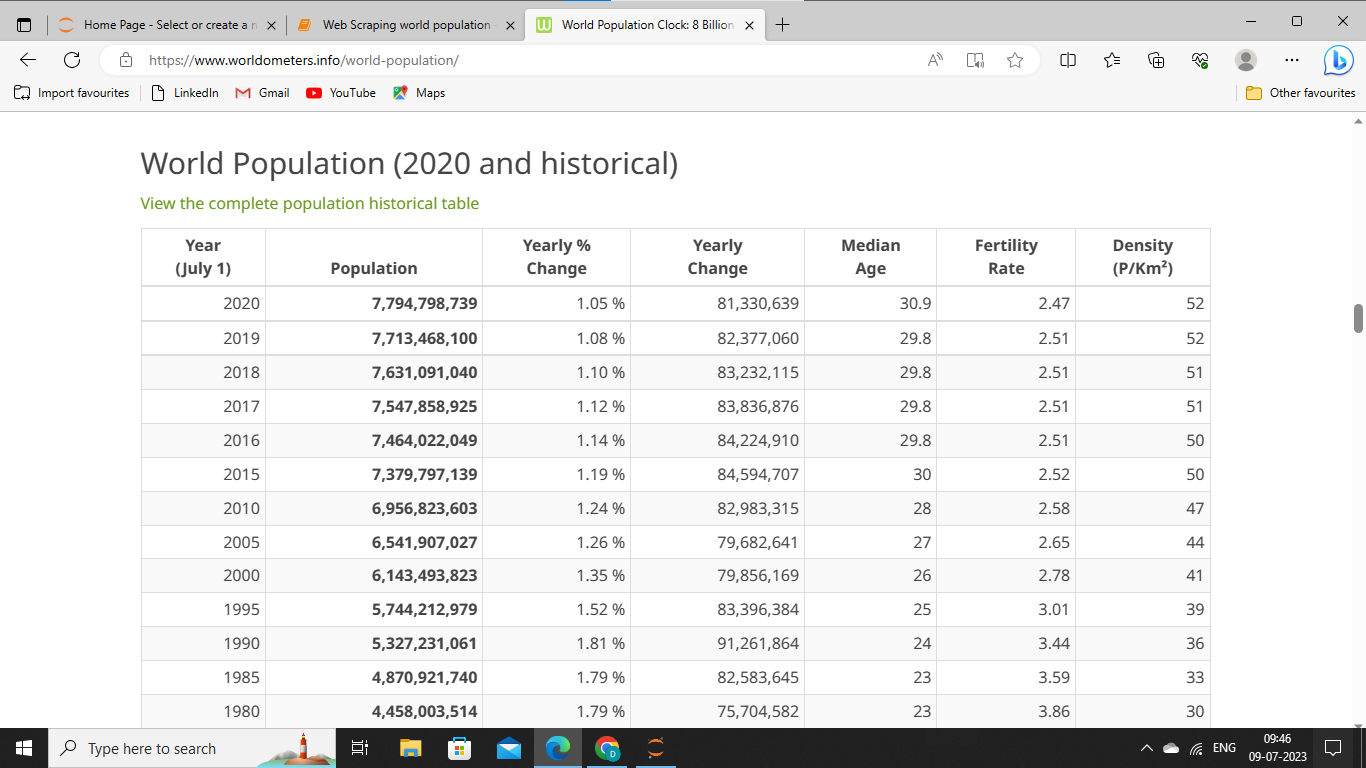

In [22]:
# Importing packages
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [23]:
url = "https://www.worldometers.info/world-population/"
page = requests.get(url)
print(page)

<Response [200]>


In [24]:
soup = BeautifulSoup(page.text,"lxml")
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>World Population Clock: 8 Billion People (LIVE, 2023) - Worldometer</title> <meta content="How many people are there in the world? World population has reached 8 billion on November 15, 2022 according to the United Nations. World population live counter with data sheets, graphs, maps, and census data regarding the current, historical, and future world population figures, estimates, growth rates, densities and demographics" name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.

In [25]:
table =soup.find("table",{"class":"table table-striped table-bordered table-hover table-condensed table-list"})
table

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th> </tr><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr> <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> </tr></thead><tbody><tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2016</td> <td><strong>7,464,022,049</strong></td> <td>1.14 %</td> <td>84,224,910</td> <td>29.8</td> <td>2.51</td> <td>50</

In [26]:
table.find_all("th")

[<th>Year<br/> (July 1) </th>,
 <th>Population</th>,
 <th>Yearly % <br/> Change</th>,
 <th>Yearly<br/> Change</th>,
 <th>Median <br/>Age</th>,
 <th>Fertility <br/>Rate</th>,
 <th>Density <br/>(P/Km²)</th>]

In [27]:
header = []
for i in table.find_all("th"):
    col_name = i.text
    header.append(col_name)

In [28]:
header

['Year (July 1) ',
 'Population',
 'Yearly %  Change',
 'Yearly Change',
 'Median Age',
 'Fertility Rate',
 'Density (P/Km²)']

In [29]:
final_df = pd.DataFrame(columns=header)
final_df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)


In [30]:
for i in table.find_all("tr")[1:]:
    row_data = i.find_all("td")
    rows = [t.text for t in row_data]
    lenght =len(final_df)
    final_df.loc[lenght] =rows

In [96]:
final_df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50
5,2015,"7,379,797,139",1.19 %,"84,594,707",30,2.52,50
6,2010,"6,956,823,603",1.24 %,"82,983,315",28,2.58,47
7,2005,"6,541,907,027",1.26 %,"79,682,641",27,2.65,44
8,2000,"6,143,493,823",1.35 %,"79,856,169",26,2.78,41
9,1995,"5,744,212,979",1.52 %,"83,396,384",25,3.01,39


In [94]:
final_df.columns

Index(['Year (July 1) ', 'Population', 'Yearly %  Change', 'Yearly Change',
       'Median Age', 'Fertility Rate', 'Density (P/Km²)'],
      dtype='object')

Text(0, 0.5, 'Population ')

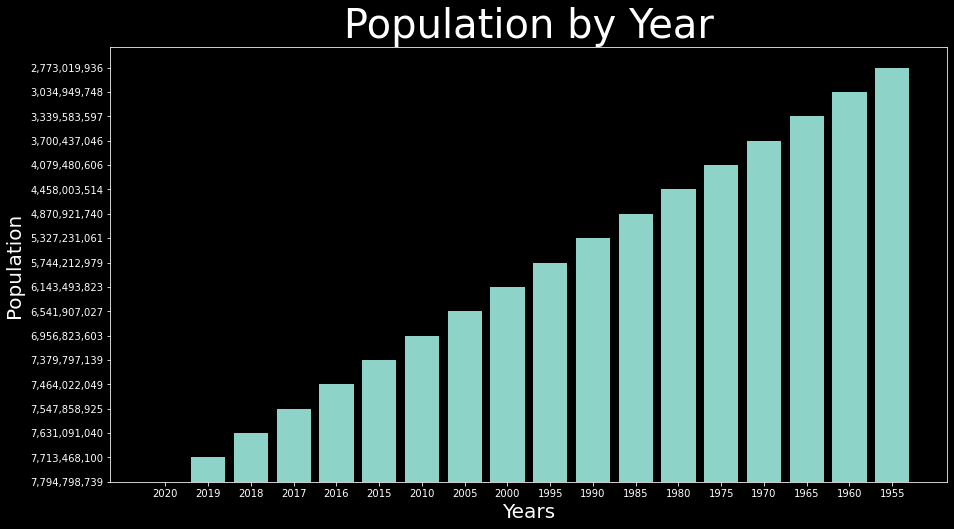

In [99]:
plt.figure (figsize= (15,8))
# plt.style.use('dark_background')

plt.bar(final_df["Year (July 1) "],final_df["Population"])

plt.title("Population by Year",fontsize = 40)

plt.xlabel("Years",fontsize = 20)

plt.ylabel("Population ",fontsize = 20)

# Table 2  : World Population Forecast (2020-2050)


In [35]:
soup1 = BeautifulSoup(page.text,"html.parser")
soup1

 <!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>World Population Clock: 8 Billion People (LIVE, 2023) - Worldometer</title> <meta content="How many people are there in the world? World population has reached 8 billion on November 15, 2022 according to the United Nations. World population live counter with data sheets, graphs, maps, and census data regarding the current, historical, and future world population figures, estimates, growth rates, densities and demographics" name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x6

In [71]:
table_2 = soup1.find_all("table",{"class":"table table-striped table-bordered table-hover table-condensed table-list"})
table_2[1]

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/> Age</th><th>Fertility <br/> Rate</th><th>Density <br/> (P/Km²)</th> </tr></thead><tbody><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.10 %</td> <td>83,000,320</td> <td>31</td> <td>2.47</td> <td>52</td> </tr> <tr> <td>2025</td> <td><strong>8,184,437,460</strong></td> <td>0.98 %</td> <td>77,927,744</td> <td>32</td> <td>2.54</td> <td>55</td> </tr><tr> <td>2030</td> <td><strong>8,548,487,400</strong></td> <td>0.87 %</td> <td>72,809,988</td> <td>33</td> <td>2.62</td> <td>57</td> </tr><tr> <td>2035</td> <td><strong>8,887,524,213</strong></td> <td>0.78 %</td> <td>67,807,363</td> <td>34</td> <td>2.70</td> <td>60</td> </tr><tr> <td>2040</td> <td><strong>9,198,847,240</strong></td> <td>0.69 %</td> <td>62,264,605</td> <td>35</td> <td>2.77</td> <td>62</td> </t

In [72]:
table_2[1].find_all("th")

[<th>Year<br/> (July 1) </th>,
 <th>Population</th>,
 <th>Yearly % <br/> Change</th>,
 <th>Yearly<br/> Change</th>,
 <th>Median <br/> Age</th>,
 <th>Fertility <br/> Rate</th>,
 <th>Density <br/> (P/Km²)</th>]

In [73]:
header_2 = []
for i in table_2[1].find_all("th"):
    col_names = i.text
    header_2.append(col_names)

In [74]:
header_2

['Year (July 1) ',
 'Population',
 'Yearly %  Change',
 'Yearly Change',
 'Median  Age',
 'Fertility  Rate',
 'Density  (P/Km²)']

In [75]:
final_df_2 = pd.DataFrame(columns=header_2)
final_df_2

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)


In [77]:
for i in table_2[1].find_all("tr")[1:]:
    row_data_2 = i.find_all("td")
    rows_2 = [t.text for t in row_data_2]
    lenght_2 =len(final_df_2)
    final_df_2.loc[lenght_2] =rows_2

In [78]:
final_df_2

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)
0,2020,"7,794,798,739",1.10 %,"83,000,320",31,2.47,52
1,2025,"8,184,437,460",0.98 %,"77,927,744",32,2.54,55
2,2030,"8,548,487,400",0.87 %,"72,809,988",33,2.62,57
3,2035,"8,887,524,213",0.78 %,"67,807,363",34,2.70,60
4,2040,"9,198,847,240",0.69 %,"62,264,605",35,2.77,62
5,2045,"9,481,803,274",0.61 %,"56,591,207",35,2.85,64
6,2050,"9,735,033,990",0.53 %,"50,646,143",36,2.95,65


In [84]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Fertility Rate')

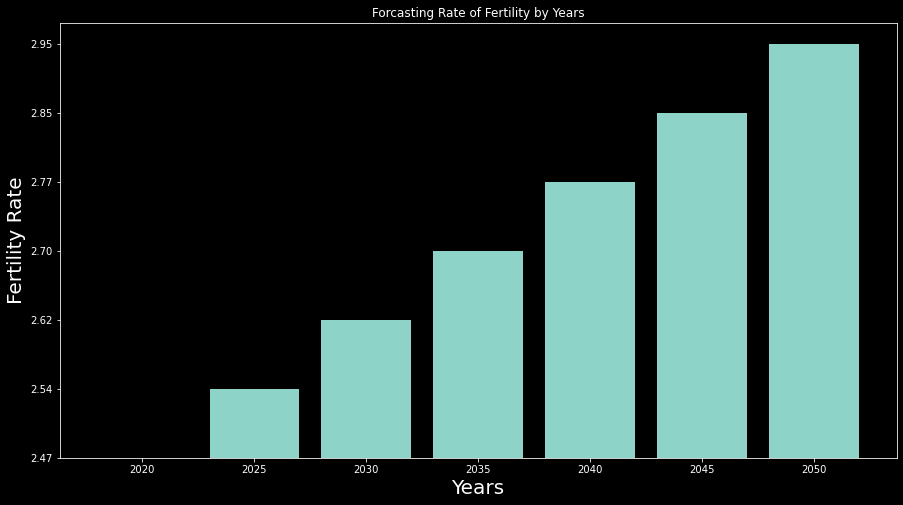

In [92]:
# importing the style package
from matplotlib import style

plt.figure (figsize= (15,8))
# plt.style.use('dark_background')

plt.bar(final_df_2["Year (July 1) "],final_df_2["Fertility  Rate"])

plt.title("Forcasting Rate of Fertility by Years")

plt.xlabel("Years",fontsize = 20)

plt.ylabel("Fertility Rate",fontsize = 20)

**we can see that population and fertility rate is increasing year by year**

In [ ]:
#final_df.to_csv("world population.csv",index=False)